# Data Analysis

In the data processing notebook, I prepared two different datasets containing information about the deforestation of the Brazilian Amazon, as well as the cattle population, GDP per capita and HDI of the region called the Legal Amazon. The latter is a geopolitical definition that was introduced in 1953 in order to help plan the development of that region, and it encompasses nine Brazilian states: Acre, Amapá, Amazonas, Mato Grosso, Pará, Rondônia, Roraima, Tocantins and part of Maranhão.

In this notebook, I investigate the historical deforestation data through statistical analysis and data visualization. The correlations between deforestation and the cattle population, as well as GDP per capita and HDI, are computed. The goal is to generate insights on the deforestation of the Brazilian Amazon and how it relates to  beef production and socioeconomic indicators.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import gridspec
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing deforestation, GDP, cattle population dataset:
df = pd.read_csv('data/data.csv', index_col=0)
df.head()

,year,area_rate,uf,pop,PIBpcpt,PIBpcpt_rate,cattle_pop,cattle_rate
0,1988,620,ACRE,407178,NaN,NaN,386995.0,NaN
1,1989,540,ACRE,411984,NaN,NaN,393925.0,6930.0
2,1990,550,ACRE,416790,NaN,NaN,400085.0,6160.0
3,1991,380,ACRE,423199,NaN,NaN,404434.0,4349.0
4,1992,400,ACRE,428006,NaN,NaN,409172.0,4738.0


- year: year in which the data retales to;
- area_rate: how much area (km²) was deforested in that year;
- uf: Brazilian state;
- pop: human population;
- PIBpcpt: GDP per capita;
- PIBpcpt_rate: how much GDP per capita varied from previous year to current year;
- cattle_pop: cattle population
- cattle_rate: how much cattle population varied from previous year to current year;

# 1. Deforestation in the states of the Legal Amazon

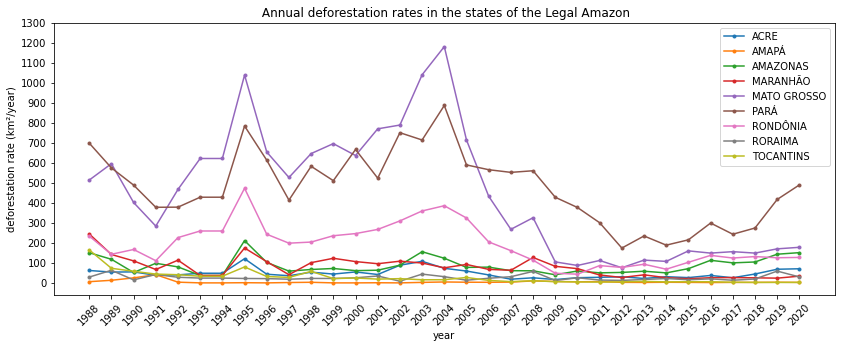

In [3]:
# Plotting deforestation data:
plt.figure(figsize=(14,5)); ax = plt.subplot()
for state in df["uf"].unique():
    x = df[df["uf"]==state]['year']
    y = df[df["uf"]==state]['area_rate']
    plt.plot(x,y,marker='.',label=state);plt.legend();plt.xlabel("year");plt.ylabel("deforestation rate (km²/year)")
    plt.title(" Annual deforestation rates in the states of the Legal Amazon")
    ax.set_yticks([1000*i for i in range(14)]); ax.set_yticklabels([str(100*i) for i in range(14)]);
    ax.set_xticks(x); ax.set_xticklabels(x,rotation=45);
plt.savefig('images/defor_rates.jpg',bbox_inches='tight', dpi=150);plt.show();

The graph above shows that there were high levels of deforestation during in years 1995 and 2004. A substantial decrease in the deforestation rates can be noticed for all states after 2004, but after 2012 the rates started to increase again. The states of Mato Grosso, Pará and Rondônia present the highest deforestation rates in the Legal Amazon.

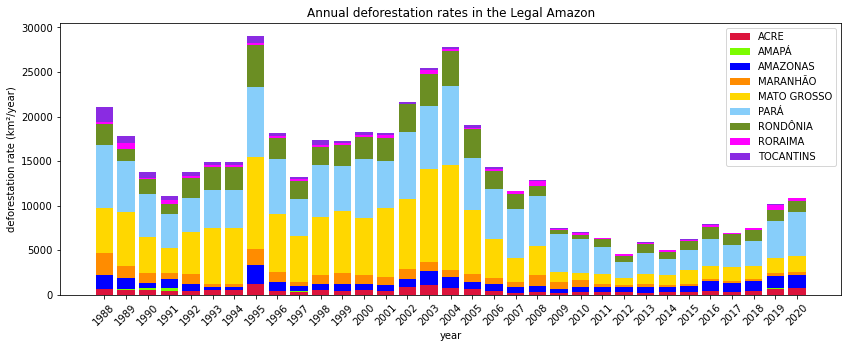

In [4]:
# Plotting total annual deforestation in the Legal Amazon:
l = []
for state in df.sort_values(['year','uf']).uf.unique():
    l.append(df.sort_values(['year','uf'])[df.uf==state]['area_rate'].values)
bottom1 = np.add(l[0],l[1])
bottom2 = np.add(bottom1, l[2])
bottom3 = np.add(bottom2, l[3])
bottom4 = np.add(bottom3, l[4])
bottom5 = np.add(bottom4, l[5])
bottom6 = np.add(bottom5, l[6])
bottom7 = np.add(bottom6, l[7])
states = df.sort_values(['year','uf']).uf.unique()
xlabels = [str(i) for i in df.sort_values(['year']).year.unique()]
x = range(len(xlabels))
clr = ['crimson','lawngreen','blue','darkorange','gold','lightskyblue','olivedrab','fuchsia','blueviolet']

plt.figure(figsize=(14,5))
plt.bar(x, l[0], label=states[0], color=clr[0])
plt.bar(x, l[1], bottom=l[0], label=states[1], color=clr[1])
plt.bar(x, l[2], bottom=bottom1, label=states[2], color=clr[2])
plt.bar(x, l[3], bottom=bottom2, label=states[3], color=clr[3])
plt.bar(x, l[4], bottom=bottom3, label=states[4], color=clr[4])
plt.bar(x, l[5], bottom=bottom4, label=states[5], color=clr[5])
plt.bar(x, l[6], bottom=bottom5, label=states[6], color=clr[6])
plt.bar(x, l[7], bottom=bottom6, label=states[7], color=clr[7])
plt.bar(x, l[8], bottom=bottom7, label=states[8], color=clr[8])
plt.title("Annual deforestation rates in the Legal Amazon");
plt.legend(); plt.xlabel("year"); plt.ylabel("deforestation rate (km²/year)");
ax = plt.subplot(); ax.set_xticks(x); ax.set_xticklabels(xlabels,rotation=45);
plt.savefig('images/defor_total_rates.jpg',bbox_inches='tight', dpi=150);plt.show();

The graph above shows the contribution of each state to the total annual deforestation in the Legal Amazon. Although Mato Grosso is the state with the highest annual deforestation rates between 1988 and 2004, it presented a substantial decrease in the years following 2004. Comparatively, the state of Pará, which is the second with highest annual deforestation rates in the former time interval, seems to have higher inertia regarding changes in the deforestation rates after 2004. 

In [5]:
# Total area (km²) which was deforested from 1988 to 2020:
df.area_rate.sum()

457237

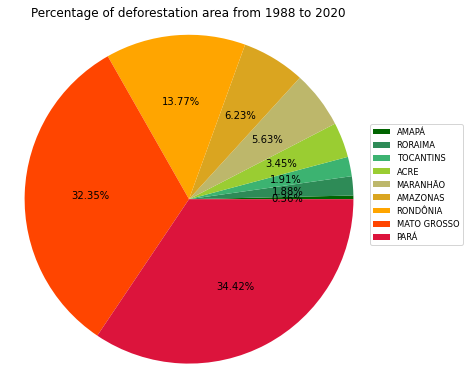

In [6]:
# Creating a dataframe for the total desforestation from 1988 to 2020:
df_totdef = pd.DataFrame(columns=['total_area','uf'])
for state in df["uf"].unique():
    total_area = df[df["uf"]==state]["area_rate"].sum()
    df_totdef = df_totdef.append({'total_area': total_area, 'uf': state}, ignore_index=True)
df_totdef

# Plotting this dataset as a pie chart:
areas = list(df_totdef.sort_values("total_area").total_area)
states = list(df_totdef.sort_values("total_area").uf.unique())
colors = ["darkgreen","seagreen","mediumseagreen","yellowgreen","darkkhaki","goldenrod","orange","orangered","crimson"]
plt.figure(figsize=(6.5,6.5))
plt.pie(areas, autopct='%0.2f%%',colors=colors); plt.legend(states,loc=(1, 0.37),fontsize='small')
plt.axis('equal')
plt.title("Percentage of deforestation area from 1988 to 2020");
plt.savefig('images/pie_chart.jpg',bbox_inches='tight', dpi=150);plt.show();

From 1988 to 2020, the Brazil Amazon forest lost approximately 457237 km² of area. The top three states with the biggest portions of deforestation area are Pará (34.42%), Mato Grosso (32.35%) and Rondônia (13.77%). On the other hand, the states with the three lowest deforestation areas are Amapá (0.36%), Roraima (1.88%) and Tocantins (3.45%).

# 2. Deforestation and the cattle population

In this section, the correlation between deforestation and cattle population will be verified, since it is has been brought to attention [1-4] that the meat industry is the main cause of deforestation in the Brazilian Amazon forest.

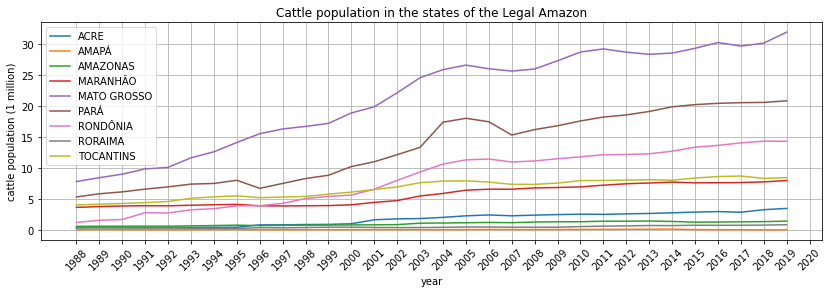

In [7]:
# Plotting cattle population data:
plt.figure(figsize=(14,4)); ax = plt.subplot()
for state in df['uf'].unique():
    x = df[df['uf']==state]['year']
    y = df[df['uf']==state]['cattle_pop']/(10**6)
    plt.plot(x,y,label=state);
    plt.legend(); plt.xlabel("year"); plt.ylabel("cattle population (1 million)")
    plt.title("Cattle population in the states of the Legal Amazon")
    ax.set_xticks(x); ax.set_xticklabels(x,rotation=45); ax.grid();
plt.savefig('images/cattle_pop.jpg',bbox_inches='tight', dpi=150);plt.show();

As shown in the first deforestation graph in the previous section, there was a strong decrease in the deforestation rates in ther period between 2004 and 2010. Now, by looking at the graph above, it is possible to notice how that decrease impacted the cattle population in the states of the Legal Amazon, especially the ones with largest cattle population, during that period. For those states, namely Mato Grosso, Pará and Rondônia, we see an abrupt deacceleration in the growth of the cattle population between 2004 and 2005, followed by a decrease of the cattle population between 2005 and 2007. After 2007, the cattle started to grow again, but in a weaker rate.

In what follows, the correlation between the deforestation and the cattlepopulation rates is going to be investigated. In the result below, we can already see that these two features are positively correlated with each other:

In [8]:
# Correlation among all features:
df.corr()

,year,area_rate,pop,PIBpcpt,PIBpcpt_rate,cattle_pop,cattle_rate
year,1.000000,-0.201993,0.194141,0.842196,0.178305,0.315652,-0.063497
area_rate,-0.201993,1.000000,0.399455,-0.184719,0.053936,0.518082,0.573436
pop,0.194141,0.399455,1.000000,-0.045032,-0.060053,0.450889,0.166365
PIBpcpt,0.842196,-0.184719,-0.045032,1.000000,0.378767,0.354394,-0.151891
PIBpcpt_rate,0.178305,0.053936,-0.060053,0.378767,1.000000,0.299391,0.088962
cattle_pop,0.315652,0.518082,0.450889,0.354394,0.299391,1.000000,0.408244
cattle_rate,-0.063497,0.573436,0.166365,-0.151891,0.088962,0.408244,1.000000


In the following, the deforestation and the cattle population rates will be plotted, and the correlation will be calculated for each state individually. Let us focus only on the three states with highest cattle population: Mato Grosso, Pará and Rondônia.

In [9]:
# Plots deforestation rate and cattle population rate curves:
def plot_cattle_defor(state):
    x = df[df['uf']==state].year
    y1 = df[df['uf']==state].area_rate
    y2 = df[df['uf']==state].cattle_rate/(10**6)
    fig = plt.figure(figsize=(10,2.5))
    ax1 = fig.add_subplot(111); 
    lns1 = ax1.plot(x, y1, '-r', label = 'deforestation')
    ax2 = ax1.twinx(); lns2 = ax2.plot(x, y2, '-', label = 'cattle')
    ax1.set_xticks(x); ax1.set_xticklabels(x,rotation=75);
    # Adding these lines in one single legend
    lns = lns1+lns2; labs = [l.get_label() for l in lns]; plt.legend(lns, labs);
    ax1.grid()
    ax1.set_xlabel('year'); ax1.set_ylabel('deforestation rate (km²/year)'); ax2.set_ylabel('cattle rate (1 million/year)');
    plt.title(state);
    if ' ' in state:
        statename = state.replace(' ','_')
    else:
        statename = state
    filename = 'images/cattle_'+statename+'.jpg'
    plt.savefig(filename,bbox_inches='tight', dpi=150); plt.show();

# Computes stats:    
def stat1(state):
    corr = df[df.uf==state]['area_rate'].corr(df[df.uf==state]['cattle_rate'])
    mean_defor = round(df[df.uf==state]['area_rate'].mean(),2)
    mean_cat = round(df[df.uf==state]['cattle_rate'].mean())
    print(state)
    print('Deforestation and cattle correlation: ',round(corr,4))
    print('Mean deforestation rate (km²/year):   ',mean_defor)
    print('Mean cattle growth (cattle/year):     ',mean_cat)

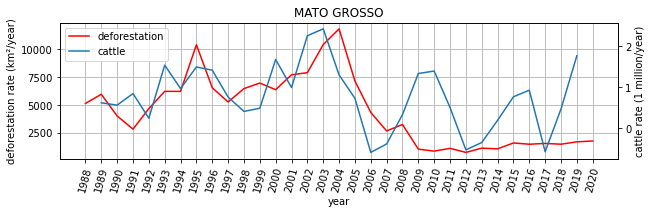

MATO GROSSO
Deforestation and cattle correlation:  0.51
Mean deforestation rate (km²/year):    4482.97
Mean cattle growth (cattle/year):      778187


In [10]:
state = 'MATO GROSSO'; plot_cattle_defor(state); stat1(state);

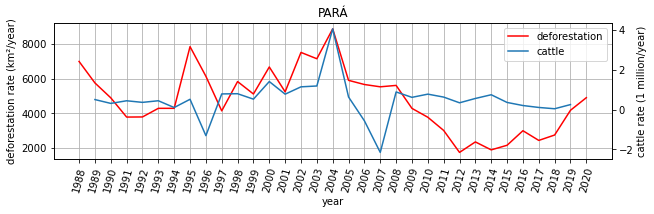

PARÁ
Deforestation and cattle correlation:  0.3329
Mean deforestation rate (km²/year):    4768.91
Mean cattle growth (cattle/year):      500513


In [11]:
state = 'PARÁ'; plot_cattle_defor(state); stat1(state);

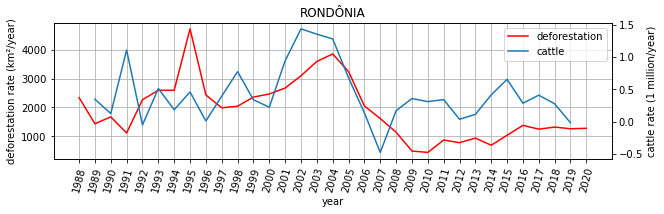

RONDÔNIA
Deforestation and cattle correlation:  0.4392
Mean deforestation rate (km²/year):    1907.58
Mean cattle growth (cattle/year):      422623


In [12]:
state = 'RONDÔNIA'; plot_cattle_defor(state); stat1(state);

The three graphs above together its statistics show that the deforestation and cattle population are positively correlated. The state with highest mean cattle growth, Mato Grosso, has the strongest correlation with deforestation, 0.51.

In the following, we can see the statistics for all states in the Legal Amazon:

In [13]:
for state in df.uf.unique():
    stat1(state)

ACRE
Deforestation and cattle correlation:  0.0909
Mean deforestation rate (km²/year):    478.15
Mean cattle growth (cattle/year):      100732
AMAPÁ
Deforestation and cattle correlation:  0.0098
Mean deforestation rate (km²/year):    49.67
Mean cattle growth (cattle/year):      -658
AMAZONAS
Deforestation and cattle correlation:  0.3167
Mean deforestation rate (km²/year):    863.15
Mean cattle growth (cattle/year):      27302
MARANHÃO
Deforestation and cattle correlation:  0.1077
Mean deforestation rate (km²/year):    780.39
Mean cattle growth (cattle/year):      139833
MATO GROSSO
Deforestation and cattle correlation:  0.51
Mean deforestation rate (km²/year):    4482.97
Mean cattle growth (cattle/year):      778187
PARÁ
Deforestation and cattle correlation:  0.3329
Mean deforestation rate (km²/year):    4768.91
Mean cattle growth (cattle/year):      500513
RONDÔNIA
Deforestation and cattle correlation:  0.4392
Mean deforestation rate (km²/year):    1907.58
Mean cattle growth (cattle/y

# 2. Deforestation and socioeconomic development

Because the HDI in Brazil is calculated every 10 years or so (this interval varies from time to time, it can increase or decrease by a couple of years), I will plot the average value of the deforestation area in that same interval. In other words, when I plot the HDI of the year of 2000, I will simultaneously plot the average deforestation area between 1991 and 2000; then, when I plot the HDI of the year 2010, I will also plot the average deforestation area between 2000 and 2010; similarly, for the HDI related to 2017, I will plot the deforestation area between 2010 and 2017. Note that since the deforestation data that goes from 1988 to 2020, when I plot the HDI for 1991, the corresponding average deforestation area will be that of 1988 to 1991.

In [14]:
# Calculating the average deforestation area between certain time intervals:
df_avgdef = pd.DataFrame(columns=['year','uf','avg_area_int'])
for state in df['uf'].unique():
    avg1991 = round(df[(df.uf==state)&((df.year>=1988)&(df.year<=1991))].area_rate.mean())
    avg2000 = round(df[(df.uf==state)&((df.year>1991)&(df.year<=2000))].area_rate.mean())
    avg2010 = round(df[(df.uf==state)&((df.year>2000)&(df.year<=2010))].area_rate.mean())
    avg2017 = round(df[(df.uf==state)&((df.year>2010)&(df.year<=2017))].area_rate.mean())
    df_avgdef = df_avgdef.append({'year':1991, 'uf':state, 'avg_area_int':avg1991}, ignore_index=True)
    df_avgdef = df_avgdef.append({'year':2000, 'uf':state, 'avg_area_int':avg2000}, ignore_index=True)
    df_avgdef = df_avgdef.append({'year':2010, 'uf':state, 'avg_area_int':avg2010}, ignore_index=True)
    df_avgdef = df_avgdef.append({'year':2017, 'uf':state, 'avg_area_int':avg2017}, ignore_index=True)
df_avgdef.head(2)

,year,uf,avg_area_int
0,1991,ACRE,522
1,2000,ACRE,543


In [15]:
# Importing HDI dataset:
df_IDHM = pd.read_csv('data/data_IDHM.csv', index_col=0)
# Selecting only the states belonging to the Legal Amazon:
condition = ((df_IDHM.uf == 'ACRE')|(df_IDHM.uf == 'AMAPÁ')|(df_IDHM.uf == 'AMAZONAS')|
            (df_IDHM.uf == 'MARANHÃO')|(df_IDHM.uf == 'MATO GROSSO')|(df_IDHM.uf == 'PARÁ')|
            (df_IDHM.uf == 'RONDÔNIA')|(df_IDHM.uf == 'RORAIMA')|(df_IDHM.uf == 'TOCANTINS'))
# Selecting only the features of interest:
df_IDHM2 = df_IDHM[condition][['year','uf','IDHM','IDHM_income','IDHM_edu','IDHM_long',
                              'IDHM_rate','IDHM_income_rate','IDHM_edu_rate','IDHM_long_rate']].copy()
df_IDHM2 = df_IDHM2.sort_values(['uf','year']).reset_index(drop=True)
# Merging dataframes:
df_IDHMdef = pd.merge(df_IDHM2,df_avgdef)
df_IDHMdef['avg_area_int'] = df_IDHMdef['avg_area_int'].astype(int)
df_IDHMdef.head(2)

,year,uf,IDHM,IDHM_income,IDHM_edu,IDHM_long,IDHM_rate,IDHM_income_rate,IDHM_edu_rate,IDHM_long_rate,avg_area_int
0,1991,ACRE,0.402,0.645,0.176,0.574,NaN,NaN,NaN,NaN,522
1,2000,ACRE,0.517,0.694,0.325,0.612,0.115,0.049,0.149,0.038,543


Now, I will use these two dataframes - df_IDHMdef and dfpib -  in the function defined below, which plots two graphs showing the relation between deforestation and GDP per capita, as well as deforestation and HDI.

In [16]:
def plot_PIB_IDHM(state,loc):

    spec = gridspec.GridSpec(ncols=2, nrows=1,width_ratios=[5,3], wspace=0.35,)

    # Plotting Deforestation and GDP
    x = df[(df['uf']==state)&(df['year']>1999)&(df['year']<2020)].year
    y1 = df[(df['uf']==state)&(df['year']>1999)&(df['year']<2020)].area_rate
    y2 = df[(df['uf']==state)&(df['year']>1999)&(df['year']<2020)].PIBpcpt_rate

    fig = plt.figure(figsize=(15,3))
    ax1 = fig.add_subplot(spec[0]); 
    lns1 = ax1.plot(x, y1, '-r', label = 'deforestation')
    ax2 = ax1.twinx(); lns2 = ax2.plot(x, y2, '-', label = 'GDP per capita')
    ax1.set_xticks(x); ax1.set_xticklabels(x,rotation=55);

    # Adding these lines in one single legend
    lns = lns1+lns2; labs = [l.get_label() for l in lns]; plt.legend(lns, labs, loc=loc);
    ax1.grid()
    ax1.set_xlabel('year'); ax1.set_ylabel('deforestation rate (km²/year)'); ax2.set_ylabel('GDP per capita rate ((R$/pop)/year)');
    plt.title(state);

    # Plotting Deforestation and HDI
    z = df_IDHMdef[(df_IDHMdef['uf']==state)&(df_IDHMdef['year']>1991)].year
    w1 = df_IDHMdef[(df_IDHMdef['uf']==state)&(df_IDHMdef['year']>1991)].avg_area_int
    w2 = df_IDHMdef[(df_IDHMdef['uf']==state)&(df_IDHMdef['year']>1991)].IDHM_rate
    w3 = df_IDHMdef[(df_IDHMdef['uf']==state)&(df_IDHMdef['year']>1991)].IDHM_income_rate
    w4 = df_IDHMdef[(df_IDHMdef['uf']==state)&(df_IDHMdef['year']>1991)].IDHM_edu_rate
    w5 = df_IDHMdef[(df_IDHMdef['uf']==state)&(df_IDHMdef['year']>1991)].IDHM_long_rate

    ax3 = fig.add_subplot(spec[1]);
    ln1 = ax3.plot(z, w1, '-r', marker='.',label = 'mean deforestation')
    ax4 = ax3.twinx();
    ln2 = ax4.plot(z, w2, marker='.',label = 'HDI')
    ln3 = ax4.plot(z, w3, marker='.', linestyle='--', label = 'HDI income')
    ln4 = ax4.plot(z, w4, marker='.', linestyle='--', label = 'HDI education')
    ln5 = ax4.plot(z, w5, marker='.', linestyle='--', label = 'HDI life expectancy')
    ax3.set_xticks(z); ax3.set_xticklabels(z);

    # Adding these lines in one single legend
    ln = ln1+ln2+ln3+ln4+ln5
    lab = [l.get_label() for l in ln]
    plt.legend(ln,lab,bbox_to_anchor=(1.15,1), loc='upper left')
    ax3.set_xlabel('year'); ax3.set_ylabel('mean deforestation (km²/year)'); ax4.set_ylabel('HDI variation')
    plt.title(state);
    if ' ' in state:
        statename = state.replace(' ','_')
    else:
        statename = state
    filename = 'images/GDP_HDI_'+statename+'.jpg'
    plt.savefig(filename,bbox_inches='tight', dpi=150); plt.show();
    
# Computes correlations between deforestation and GDP and HDI:
def print_corr(state):
    c1 = df[df.uf==state]['area_rate'].corr(df[df.uf==state]['PIBpcpt_rate'])
    c2 = df_IDHMdef[df_IDHMdef.uf==state]['avg_area_int'].corr(df_IDHMdef[df_IDHMdef.uf==state]['IDHM_rate'])
    print(state)
    print('Deforestation and GDP per capita correlation: ',c1)
    print('Deforestation and HDI correlation:            ',c2)

In [17]:
df_IDHMdef.corr()

,IDHM,IDHM_income,IDHM_edu,IDHM_long,IDHM_rate,IDHM_income_rate,IDHM_edu_rate,IDHM_long_rate,avg_area_int
IDHM,1.000000,0.968646,0.987930,0.865869,-0.445727,-0.422919,-0.035038,-0.309153,-0.139438
IDHM_income,0.968646,1.000000,0.932226,0.867239,-0.285364,-0.196623,0.056715,-0.165410,-0.041134
IDHM_edu,0.987930,0.932226,1.000000,0.801761,-0.545120,-0.523532,-0.128779,-0.388608,-0.195962
IDHM_long,0.865869,0.867239,0.801761,1.000000,-0.202001,-0.248374,0.113231,-0.139213,-0.006941
IDHM_rate,-0.445727,-0.285364,-0.545120,-0.202001,1.000000,0.910699,0.871969,0.894562,0.238500
IDHM_income_rate,-0.422919,-0.196623,-0.523532,-0.248374,0.910699,1.000000,0.706267,0.804437,0.193225
IDHM_edu_rate,-0.035038,0.056715,-0.128779,0.113231,0.871969,0.706267,1.000000,0.776793,0.147464
IDHM_long_rate,-0.309153,-0.165410,-0.388608,-0.139213,0.894562,0.804437,0.776793,1.000000,0.239299
avg_area_int,-0.139438,-0.041134,-0.195962,-0.006941,0.238500,0.193225,0.147464,0.239299,1.000000


Now, we will plot the data for deforestation, GDP per capita and HDI, and we will also compute their correlations. This will be done for each state of the Legal Amazon separately.

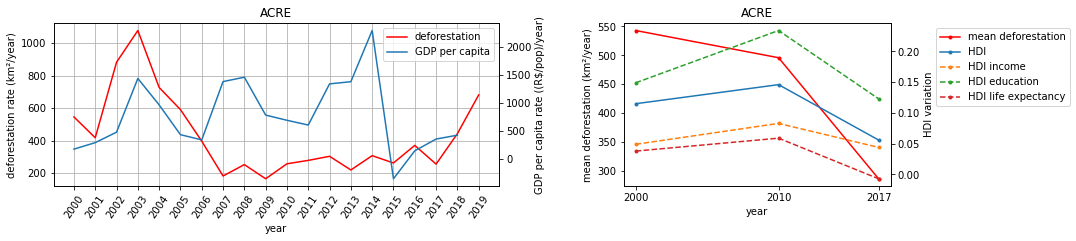

ACRE
Deforestation and GDP per capita correlation:  -0.027127432652816166
Deforestation and HDI correlation:             0.8682238408478031


In [18]:
state = 'ACRE'; plot_PIB_IDHM(state,loc=1); print_corr(state);

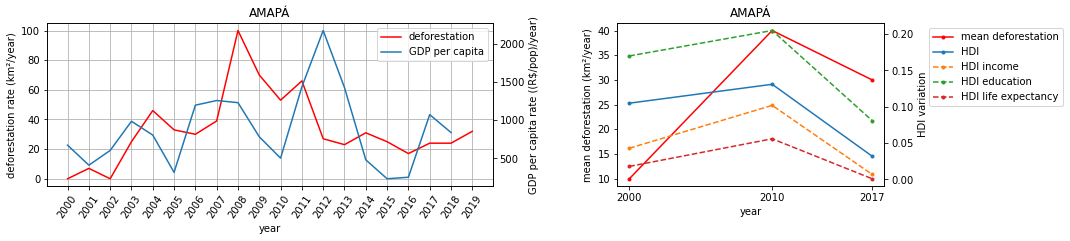

AMAPÁ
Deforestation and GDP per capita correlation:  0.26795628697151724
Deforestation and HDI correlation:             0.06590019310499348


In [19]:
state = 'AMAPÁ'; plot_PIB_IDHM(state,loc=1); print_corr(state);

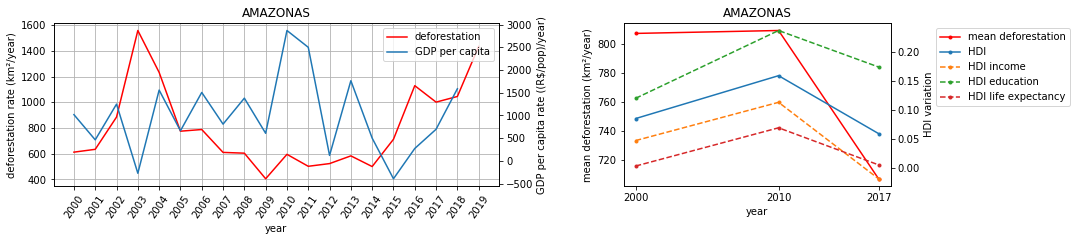

AMAZONAS
Deforestation and GDP per capita correlation:  -0.24598653506042012
Deforestation and HDI correlation:             0.7131638403445218


In [20]:
state = 'AMAZONAS'; plot_PIB_IDHM(state,loc=1); print_corr(state);

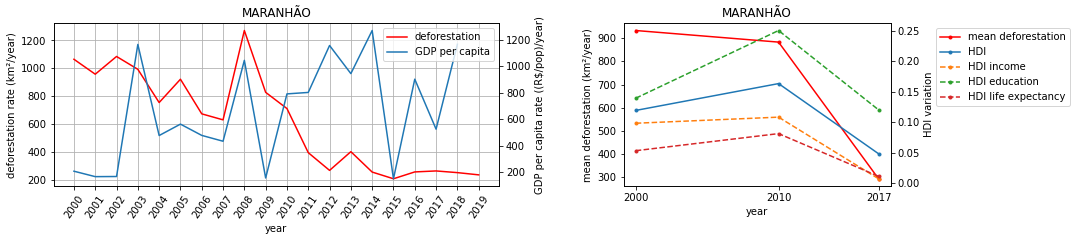

MARANHÃO
Deforestation and GDP per capita correlation:  -0.3346897498304895
Deforestation and HDI correlation:             0.8963741978852545


In [21]:
state = 'MARANHÃO'; plot_PIB_IDHM(state,loc=1); print_corr(state);

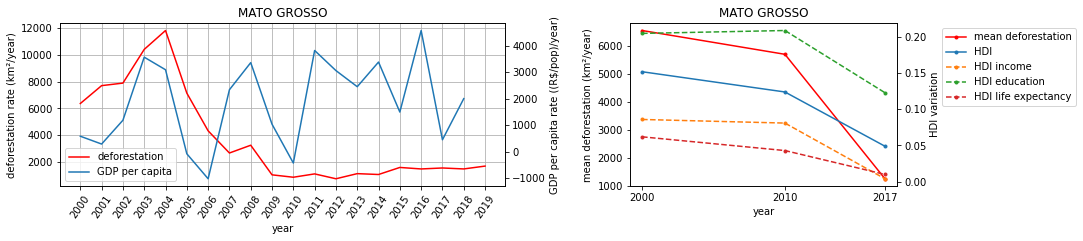

MATO GROSSO
Deforestation and GDP per capita correlation:  -0.08411178456087995
Deforestation and HDI correlation:             0.993281314902953


In [22]:
state = 'MATO GROSSO'; plot_PIB_IDHM(state,loc=0); print_corr(state);

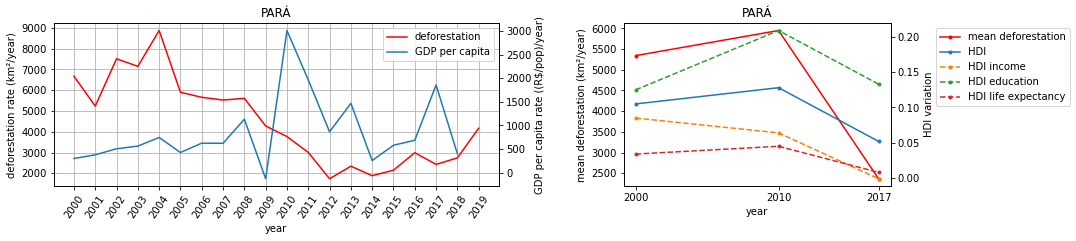

PARÁ
Deforestation and GDP per capita correlation:  -0.2717455344460043
Deforestation and HDI correlation:             0.9901275826332506


In [23]:
state = 'PARÁ'; plot_PIB_IDHM(state,loc=0); print_corr(state);

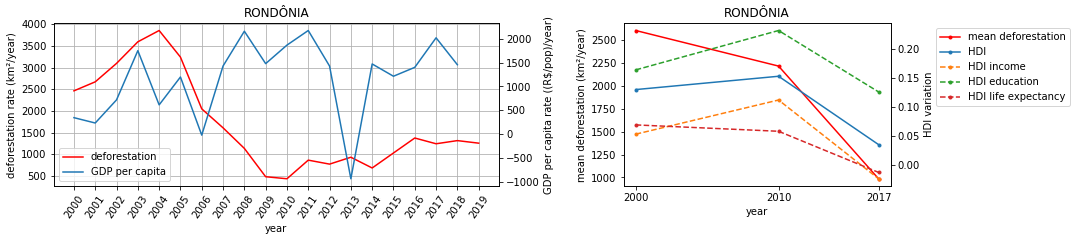

RONDÔNIA
Deforestation and GDP per capita correlation:  -0.30107746583822176
Deforestation and HDI correlation:             0.9143871018056111


In [24]:
state = 'RONDÔNIA'; plot_PIB_IDHM(state,loc=0); print_corr(state);

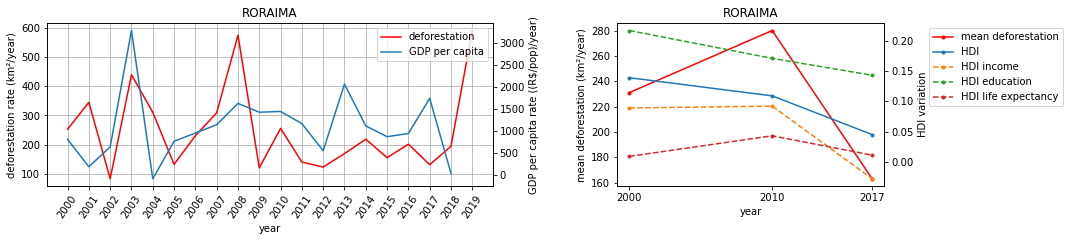

RORAIMA
Deforestation and GDP per capita correlation:  0.2899857356304082
Deforestation and HDI correlation:             0.7331575401212136


In [25]:
state = 'RORAIMA'; plot_PIB_IDHM(state,loc=0); print_corr(state);

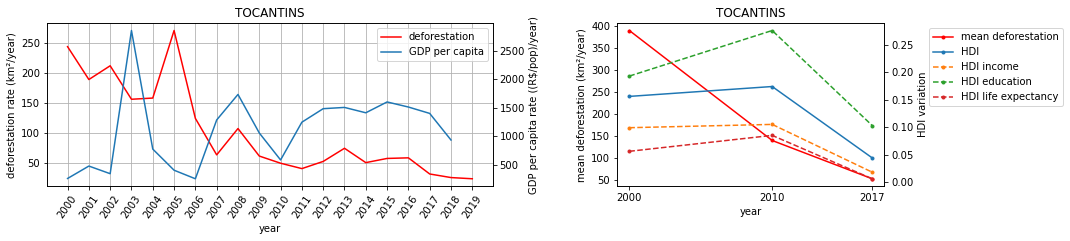

TOCANTINS
Deforestation and GDP per capita correlation:  -0.4407120143767732
Deforestation and HDI correlation:             0.6026020362987095


In [26]:
state = 'TOCANTINS'; plot_PIB_IDHM(state,loc=0); print_corr(state);

## Final Remarks

The historical deforestation data of the Legal Amazon were analyzed together with the data of the cattle population, GDP per capita and HDI of that region.

The deforestation rates in the Legal Amazon grew with oscillations from 1988 to 2004. After that, it decreased significantly until 2012, and then it started to increase again with smaller rate. In that region, the states with the biggest areas of deforestation are Pará, Mato Grosso and Rondônia.

The correlation between deforestation and the growth of cattle population is overall *positive*, endorsing what was mentioned in references [1-4] about the meat industry as one of the main causes of the deforestation of the Brazilian Amazon. For states where the deforestation rates are low, the cattle population and the deforested area growths seem to be uncorrelated. On the other hand, the correlation between the deforested area and the cattle population growth is stronger for states with high cattle population and deforestation rates.

For seven of the nine states belonging to the Legal Amazon, the variation in GDP per capita is *negatively* correlated to deforestation rates. On the other hand, the variation in the HDI between 1991 and 2000, 2000 and 2010, 2010 and 2017 seem to be strongly, positively correlated with mean deforestation rates for those periods, respectively.

Furthermore, this analysis endorsed the claim that economical growth in the Legal Amazon does not depend on the destruction of the Amazon forest. In fact, for most of the states, it seems to increase as the deforestation rates decrease in time. It remains to answer to the question of how human development can benefit from the economical growth as the deforestation rates decrease. Further analysis on other kinds of socioeconomic indicators, such as how the income is distributed and what are the main human an natural resources in each state, is necessary in order to look for effective solutions to this social challenge.


## References

[1] Margulis, S. "Causas do desmatamento na Amazônia brasileira". Brasília, DF: Banco Mundial, 2003.<br>
[2] Rivero, S.; Almeida, O.; Ávila, S.; Oliveira, W. "Pecuária e desmatamento: uma análise das principais causas diretas do desmatamento na Amazônia". Nova Economia, Belo Horizonte, v. 1, n. 19, p. 41-66, jan./abr. 2009.<br>
[3] Ladle, R. J.; Machado, A. C. M.; Todd, P. A.; Malhado, A. C. M. "Perceptions of Amazonian deforestation in the British and Brazilian media". Acta Amazonica, Manaus, v. 40, n. 2, p. 319-324, 2010.<br>
[4] Moloney, A. "Amazon deforestation rose 17% in 'dire' 2020, data shows". Reuters, 2021.<br>